# 1. Install and Import Dependencies

In [ ]:
# If you have GPU, please run this
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
# No GPU:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [2]:
!cd yolov5 & pip install -r requirements.txt

You should consider upgrading via the 'C:\Users\Fuen\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Fuen/.cache\torch\hub\master.zip
YOLOv5  2021-11-24 torch 1.8.2+cpu CPU



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (co

In [ ]:
!pip uninstall opencv-python

In [ ]:
!pip install opencv-python

In [5]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['licence']
number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    '''
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
           '''
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 15 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [12]:
!cd yolov5
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Fuen/.cache\torch\hub\master.zip
YOLOv5  2021-11-24 torch 1.8.2+cpu CPU

Fusing layers... 
Model Summary: 213 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [7]:
img = os.path.join('yolov5','data', 'images', 'Cars8.png')

In [8]:
!cd yolov5
!dir

 驱动器 C 中的卷没有标签。
 卷的序列号是 E26F-F444

 C:\Users\Fuen\Downloads\YOLO-Drowsiness-Detection-main\YOLO-Drowsiness-Detection-main 的目录

2021/11/24  11:57    <DIR>          .
2021/11/24  11:57    <DIR>          ..
2021/11/07  20:21    <DIR>          .ipynb_checkpoints
2021/11/13  15:09                 0 0.8.1'
2021/11/13  15:09                 0 1.7.0'
2021/11/07  19:22                 0 3.2.2'
2021/11/24  11:57            62,662 Car plate recognition.ipynb
2021/10/28  20:12    <DIR>          labelImg
2021/11/24  11:47    <DIR>          yolov5
               4 个文件         62,662 字节
               5 个目录 13,514,903,552 可用字节


In [13]:
results = model(img)

In [14]:
results.print()

image 1/1: 232x500 1 plate
Speed: 7.0ms pre-process, 164.1ms inference, 1.0ms NMS per image at shape (1, 3, 320, 640)


In [ ]:
labels, cord_thres = results.xyxyn[0][:, -1].numpy(), results.xyxyn[0][:, :-2].numpy()
print(cord_thres[0])
print(results.xyxy[0][:,:-2].numpy()[0])

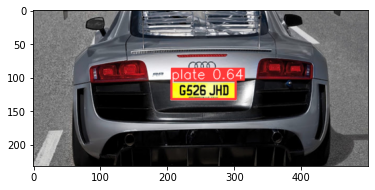

In [15]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [16]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    #cv2.imshow(frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Apply OCR

In [ ]:
!pip install easyocr

In [ ]:
import easyocr

In [ ]:
detection_threshold = 0.1

In [ ]:
reader = easyocr.Reader(['en'])

In [ ]:
reader.readtext(img, detail = 0)

In [ ]:
# crop img 
bounding_box = results.xyxy[0][:,:-2].numpy()[0]
print(bounding_box)
print(int(bounding_box[0]))
img = os.path.join('yolov5','data', 'images', 'Cars3.png')
test_img = cv2.imread(img)
crop_img = test_img[int(bounding_box[1]):int(bounding_box[3]),int(bounding_box[0]):int(bounding_box[2])]
#cv2.imshow('tets_img',test_img)
reader.readtext(crop_img, detail = 0)

In [ ]:
vars(results)

In [ ]:
len(results.pred[0])

    

In [ ]:
character_pool = []

In [ ]:
reader = easyocr.Reader(['en'])
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    last_pred = None
    new_pred = None
    results = model(frame)
    if (len(results.pred[0]) > 0):
        if results.pred[0][0][4] > 0.8:
            bounding_box = results.xyxy[0][:,:-2].numpy()[0]
            crop_img = frame[int(bounding_box[1]):int(bounding_box[3]),int(bounding_box[0]):int(bounding_box[2])]
            new_pred = reader.readtext(crop_img, detail = 0)
            if new_pred != last_pred:
                print(new_pred)
                last_pred = new_pred
    cv2.imshow('YOLO', np.squeeze(results.render()))
    #cv2.imshow(frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()